In [1]:
import numpy as np
from scipy import stats
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
# Define map plotting function
'''xxx'''
def PlotMap(x1, x2, y1, y2):    
    coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')
    roi = [y1, y2, x2, x1]
    ax2 = plt.axes(projection=ccrs.PlateCarree())
    feature = ax2.add_feature(coast, edgecolor='black',facecolor='gray')
    ax2.set_extent(roi)
    gl = ax2.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabels_right = False
    gl.xlabels_top = False

In [4]:
fname = '~/Work/data/CMC_SST/CMC_temp_EAC_wholesystem_large.nc'
SST = xr.open_dataset(fname)
SST = SST.analysed_sst - 273.15

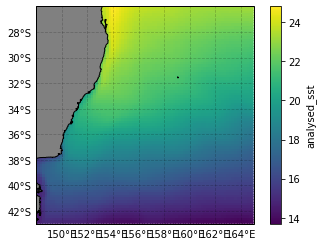

In [5]:
PlotMap(-26, -43, 148, 165)
SST.mean(dim = 'time').plot()

## Calculate annual trends

In [6]:
SST_annual_means = SST.groupby('time.year').mean('time')

year = SST_annual_means.year
lat = SST_annual_means.lat
lon = SST_annual_means.lon

print(np.shape(SST_annual_means))
SST_EAC_slope = xr.DataArray(
    np.zeros([np.shape(lat)[0], np.shape(lon)[0]]), 
    dims=('lat', 'lon'), 
    coords=[lat, lon], 
    name='SST_EAC_slope')

SST_EAC_p_value = xr.DataArray(
    np.zeros([np.shape(lat)[0], np.shape(lon)[0]]), 
    dims=('lat', 'lon'), 
    coords=[lat, lon], 
    name='SST_EAC_p_value')

for iid, i in enumerate(lat):
    for jid, j in enumerate(lon):
        SST_EAC_slope[iid, jid], _, _, SST_EAC_p_value[iid, jid], _ = \
        stats.linregress(year, SST_annual_means[:, iid, jid])
    #print('lat ' + str(np.array(i)))
#print(SST_EAC_slope)

(27, 86, 86)


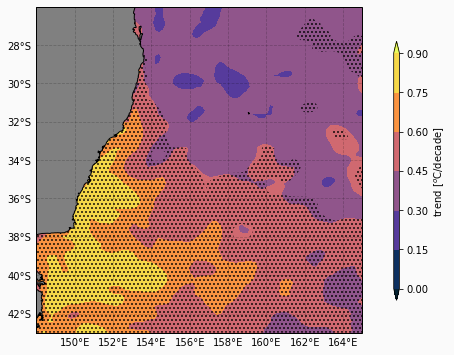

In [10]:
# Plot
roi = [148, 155, -43, -26]
fig = plt.figure(1, figsize=(8,6), facecolor=[0.98,0.98,0.98]) 

ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent(roi)

PlotMap(-26, -43, 148, 165)
#levels=np.arange(0,0.5,5)
cmap = cmocean.cm.thermal
data = SST_EAC_slope * 10
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, extend='both', vmin=0,vmax=0.9, transform=ccrs.PlateCarree())
levels2=[0, 0.01]
data2 = SST_EAC_p_value
plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
cbar_ax = fig.add_axes([.85, 0.2, .01, .6]) #left, bottom, width, height
fig.colorbar(plot, cax=cbar_ax, orientation="vertical",extend='both')
plt.ylabel('trend [$^o$C/decade]')

ax1.set_title('a) 1991 to 2017 SST decadal trend', loc='left')

plt.savefig('CMC_SST_EACsystem_trends.png', dpi=300,bbox_inches='tight')

## How does the variance look?

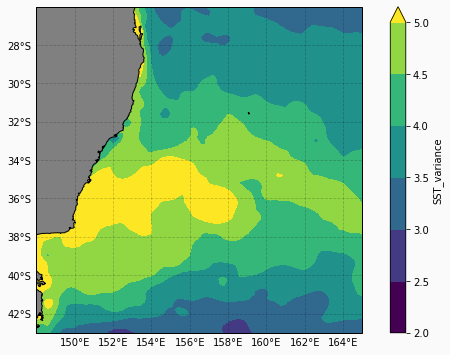

In [41]:
SST_variance = xr.DataArray(
    np.zeros([np.shape(lat)[0], np.shape(lon)[0]]), 
    dims=('lat', 'lon'), 
    coords=[lat, lon], 
    name='SST_variance')

for iid, i in enumerate(lat):
    for jid, j in enumerate(lon):
        SST_variance[iid, jid] = \
        np.var(SST.values[:, iid, jid])

fig = plt.figure(1, figsize=(10,6), facecolor=[0.98,0.98,0.98]) 
PlotMap(-26, -43, 148, 165)
cmap = cmocean.cm.thermal
SST_variance.plot.contourf(vmin=2,vmax=5)

<xarray.DataArray 'SST_variance' (lat: 86, lon: 86)>
array([[4.414666, 4.173507, 4.254597, ..., 3.112227, 3.051973, 3.018044],
       [4.490611, 4.195944, 4.362744, ..., 3.228447, 3.184049, 3.128833],
       [4.638096, 4.31958 , 4.433111, ..., 3.338746, 3.321791, 3.281266],
       ...,
       [2.307361, 2.331774, 2.347746, ..., 3.159604, 3.134478, 3.118377],
       [2.31874 , 2.331124, 2.353288, ..., 3.136318, 3.105591, 3.091585],
       [2.326549, 2.347047, 2.372041, ..., 3.108695, 3.10268 , 3.094957]])
Coordinates:
  * lat      (lat) float32 -43.0 -42.8 -42.6 -42.4 ... -26.6 -26.4 -26.2 -26.0
  * lon      (lon) float32 148.0 148.2 148.4 148.6 ... 164.4 164.6 164.8 165.0